## Oluwafemi Shobowale 
## 3
### Regression Analysis,Feature/Model Selection, K-means Clustering, Document Clustering 

In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load data 
df= pd.read_csv('communities.csv',na_values=['?'])

In [3]:
df.head()

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [4]:
######### GIVES WHICH COLOUMN HAS MISSING VALUES
df.isna().any()[lambda x: x] 

OtherPerCap    True
dtype: bool

In [5]:
########REPLACE MISSING VALUES WITH MEAN 
OtherPerCap_mean = df.OtherPerCap.mean()
OtherPerCap_mean
df.OtherPerCap.fillna(OtherPerCap_mean,axis=0,inplace=True)

In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
state,1994.0,NaN,NaN,NaN,28.683551,16.397553,1.0,12.0,34.0,42.0,56.0
communityname,1994,1828,Jacksonvillecity,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
population,1994.0,NaN,NaN,NaN,0.057593,0.126906,0.0,0.01,0.02,0.05,1.0
householdsize,1994.0,NaN,NaN,NaN,0.463395,0.163717,0.0,0.35,0.44,0.54,1.0
racepctblack,1994.0,NaN,NaN,NaN,0.179629,0.253442,0.0,0.02,0.06,0.23,1.0
...,...,...,...,...,...,...,...,...,...,...,...
PctSameState85,1994.0,NaN,NaN,NaN,0.65153,0.198221,0.0,0.56,0.7,0.79,1.0
LandArea,1994.0,NaN,NaN,NaN,0.065231,0.109459,0.0,0.02,0.04,0.07,1.0
PopDens,1994.0,NaN,NaN,NaN,0.232854,0.203092,0.0,0.1,0.17,0.28,1.0
PctUsePubTrans,1994.0,NaN,NaN,NaN,0.161685,0.229055,0.0,0.02,0.07,0.19,1.0


In [7]:
target= df["ViolentCrimesPerPop"]

In [8]:
df=df.drop(columns=['state','communityname','ViolentCrimesPerPop'])

In [9]:
features= df.columns.tolist()

In [10]:
#spliting model 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.20,  random_state=33)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
# Create linear regression object - here we'll use the default parameters
linreg = LinearRegression()

# Train the model using the training set
linreg.fit(X_train,y_train)

LinearRegression()

#### RSME ON TRIAING DATA 

In [13]:
# First, let's compute errors on all training instances

p_train = linreg.predict(X_train) # p_train is the array of predicted values

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse_train = np.sqrt(mean_squared_error(p_train, y_train))
print("RMSE on Train Data: ", rmse_train)

RMSE on Train Data:  0.1261959313342669


C:\Users\soboa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\soboa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(Text(0, 0.5, 'True'), Text(0.5, 0, 'Predicted '))

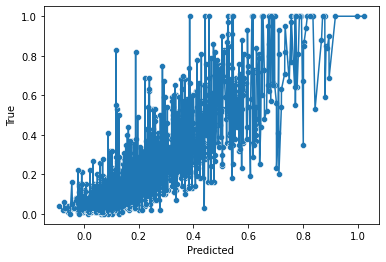

In [15]:
import seaborn as sns
%matplotlib inline
figsize=(10,10)
sns.scatterplot(p_train,y_train)
sns.lineplot(p_train,y_train)
plt.ylabel("True"), plt.xlabel("Predicted ")

#### Regression Coefficients

In [16]:
w = linreg.coef_
print(w)

[-7.52656629e-03 -5.28396680e-02  2.21547570e-01 -5.03199162e-02
 -1.96010315e-02  4.76949814e-02  1.02285177e-01 -1.69896511e-01
 -1.26211473e-01  7.14204649e-02 -1.25853261e-01  3.87986180e-02
 -2.01918099e-01 -2.13121910e-01  4.21246697e-02 -7.44445905e-02
  1.24852413e-02  2.25201184e-02 -9.58013048e-02  3.53979558e-01
  7.57326633e-02 -3.52089855e-01 -2.93676330e-02 -4.15893659e-02
  3.33220798e-02  4.71028688e-02  3.89021825e-02  2.97770808e-01
 -2.38551315e-01 -8.53275102e-03 -4.53960097e-02  7.67420267e-02
  1.56572032e-02  2.25051684e-01 -4.97873716e-02 -3.91366512e-02
  3.46194760e-01  2.11727329e-01  7.54492064e-02 -3.59121087e-01
 -1.58937159e-01 -1.73716203e-02 -2.60253644e-01 -4.63158082e-02
 -9.00374174e-03  8.91193223e-03 -1.57889829e-01 -2.66670112e-01
  1.43290159e-01 -1.18798830e-01  8.40395513e-03  4.89371965e-02
 -1.88835442e-01  1.36372557e-01 -3.22691120e-02 -2.44000729e-01
  6.40813099e-01 -3.81532245e-01 -3.50231164e-04 -1.47935514e-01
  5.34217081e-02 -2.16009

In [17]:
# The following function can be used to plot the model coefficients for better visualization
%matplotlib inline
def plot_coefficients(model, n_features, feature_names):
    pl.barh(range(n_features), model.coef_, align='center')
    pl.yticks(np.arange(n_features), feature_names)
    pl.xlabel("Coefficient Value")
    pl.ylabel("Feature")
    pl.ylim(-1, n_features)

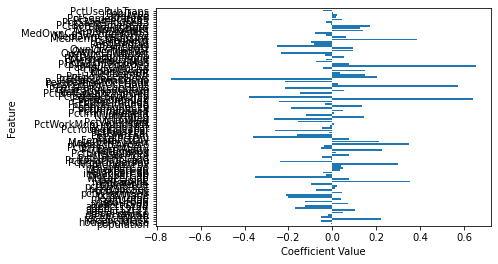

In [18]:
plot_coefficients(linreg,len(df.columns), df.columns)

In [19]:
# We can also directly obtain the regression intercept value:

print("Linear Regression Intercept: ", linreg.intercept_)

Linear Regression Intercept:  0.5191889140806047


In [20]:
def cross_validate(model, X, y, n, verbose=False):
    # model: regression model to be trained
    # X: the training data matrix
    # y: the training target variable array
    # n: the number of fold for x-validation
    # Returns mean RMSE across all folds
    
    from sklearn.metrics import mean_squared_error
    
    from sklearn.model_selection import KFold
    
    kf = KFold(n_splits=n, random_state=22, shuffle=True) # specifying random_state ensures the same random
                                            # partitions are used across different runs
    xval_err = 0
    f = 1
    for train,test in kf.split(X):
        model.fit(X.iloc[train],y.iloc[train]) # fit model to the training partition in this fold
        p_test = model.predict(X.iloc[test]) # apply trained model to test partition in this fold
        rmse_test = np.sqrt(mean_squared_error(p_test, y.iloc[test]))
        if verbose:
            print("Fold %2d RMSE: " % (f), rmse_test)
        xval_err += rmse_test
        f += 1
    return xval_err/n

In [21]:
# Computing the mean RMSE on 10-fold cross-validation
rmse_10cv = cross_validate(linreg, X_train, y_train, 10, verbose=True)

Fold  1 RMSE:  0.13004080646051497
Fold  2 RMSE:  0.1122973382037008
Fold  3 RMSE:  0.1299062910689068
Fold  4 RMSE:  0.1287471921605772
Fold  5 RMSE:  0.13322002669919653
Fold  6 RMSE:  0.1220458801664127
Fold  7 RMSE:  0.16808080432496147
Fold  8 RMSE:  0.13878438468932744
Fold  9 RMSE:  0.13255765617187254
Fold 10 RMSE:  0.15174128145070634


In [22]:
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: ' ,rmse_train)
print("RMSE on 10-fold CV:", rmse_10cv)

Method: Simple Linear Regression
RMSE on training:  0.1261959313342669
RMSE on 10-fold CV: 0.1347421661396177


### The error between on both the training data and cross-validation is low, this indicates a good fiting. The difference between both training and cross validation is not too significant which is also good. 

# Feature Selection with Cross-validation

In [23]:
from sklearn import feature_selection
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=30)
X_train_fs = fs.fit_transform(X_train, y_train)

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectPercentile, chi2,f_regression

percentiles = range(1, 100, 5)
results = []
for i in range(1, 100, 5):
    fs = SelectPercentile(f_regression, percentile=i)
    X_train_fs = fs.fit_transform(X_train, y_train)
    scores =abs(cross_val_score(linreg, X_train_fs, y_train, cv=5, scoring='neg_mean_absolute_error'))
    print( (i, scores.mean()))
    results = np.append(results, scores.mean())

(1, 0.11287401163402822)
(6, 0.09943268475677307)
(11, 0.09900510519125442)
(16, 0.09909059079526808)
(21, 0.0975068622131086)
(26, 0.09608904536542377)
(31, 0.09478480270197638)
(36, 0.09474955355002232)
(41, 0.09435370428857699)
(46, 0.09466441760571027)
(51, 0.09498773346781053)
(56, 0.09532085164805941)
(61, 0.095749668892545)
(66, 0.09572089544915725)
(71, 0.09583132229767208)
(76, 0.09519157369784723)
(81, 0.0954256882753639)
(86, 0.09513624310358182)
(91, 0.09525366581598069)
(96, 0.0952762785288391)


In [25]:
np.set_printoptions(suppress=True, precision=2, linewidth=120)
print(fs.get_support())
print(fs.scores_)

[ True  True  True  True False  True  True  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True False  True
  True  True]
[ 256.03    3.49 1074.89 1412.51    1.96  137.54    4.89   37.33   15.88    8.25  247.78   11.06  341.63  161.57
   40.34  756.01   22.49  784.57   13.98  366.9   214.99   65.45  126.58   12.32   29.07   33.37   92.37  400.31
  578.82  319.22  472.2   173.37  533.91  190.47    2.61    7.4   602.77  161.08  704.77  693.14   24.47 1657.87
 1972.8  1342.17 1299.54    1.31   36.5   431.64 1936.12  151.62   40.65

In [26]:
select_feature=[]
for i in range(len(df.columns.values)):
    if fs.get_support()[i]:
        select_feature.append(df.columns.values[i])
        print("%10s  %3.2f" % (df.columns.values[i], fs.scores_[i]))

population  256.03
householdsize  3.49
racepctblack  1074.89
racePctWhite  1412.51
racePctHisp  137.54
agePct12t21  4.89
agePct12t29  37.33
agePct16t24  15.88
agePct65up  8.25
 numbUrban  247.78
  pctUrban  11.06
 medIncome  341.63
  pctWWage  161.57
pctWFarmSelf  40.34
pctWInvInc  756.01
pctWSocSec  22.49
pctWPubAsst  784.57
pctWRetire  13.98
 medFamInc  366.90
 perCapInc  214.99
whitePerCap  65.45
blackPerCap  126.58
indianPerCap  12.32
AsianPerCap  29.07
OtherPerCap  33.37
HispPerCap  92.37
NumUnderPov  400.31
PctPopUnderPov  578.82
PctLess9thGrade  319.22
PctNotHSGrad  472.20
PctBSorMore  173.37
PctUnemployed  533.91
 PctEmploy  190.47
PctEmplManu  2.61
PctEmplProfServ  7.40
MalePctDivorce  602.77
MalePctNevMarr  161.08
FemalePctDiv  704.77
TotalPctDiv  693.14
PersPerFam  24.47
PctFam2Par  1657.87
PctKids2Par  1972.80
PctYoungKids2Par  1342.17
PctTeen2Par  1299.54
PctWorkMom  36.50
  NumIlleg  431.64
  PctIlleg  1936.12
  NumImmig  151.62
PctImmigRecent  40.65
PctImmigRec5  70.23
P

In [27]:
optimal_percentile_ind = np.where(results == results.max())[0][0]
print(optimal_percentile_ind)

0


Optimal percentile of features:1 

Optimal number of features:0 



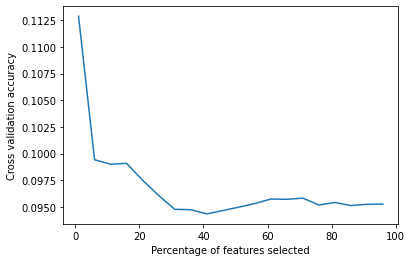

In [28]:
optimal_percentile_ind = np.where(results == results.max())[0][0]
print("Optimal percentile of features:{0}".format(percentiles[optimal_percentile_ind]), "\n")
optimal_num_features = int(percentiles[optimal_percentile_ind]*len(df.columns)/100)
print("Optimal number of features:{0}".format(optimal_num_features), "\n")

# Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results)

### 31 features are selected from the cross-validation

## Evaluate our best number of features on the test set

In [29]:
#####PICK SELECTED FEATURE
select_feature=[]
for i in range(len(df.columns.values)):
    if fs.get_support()[i]:
        select_feature.append(df.columns.values[i])

In [30]:
######new features 
new_train= df[select_feature]
new_train.head()

,population,householdsize,racepctblack,racePctWhite,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,...,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,LandArea,PopDens,PctUsePubTrans
0,0.19,0.33,0.02,0.90,0.17,0.34,0.47,0.29,0.32,0.20,...,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.12,0.26,0.20
1,0.00,0.16,0.12,0.74,0.07,0.26,0.59,0.35,0.27,0.02,...,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.02,0.12,0.45
2,0.00,0.42,0.49,0.56,0.04,0.39,0.47,0.28,0.32,0.00,...,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.01,0.21,0.02
3,0.04,0.77,1.00,0.08,0.10,0.51,0.50,0.34,0.21,0.06,...,0.47,0.00,0.0,0.19,0.30,0.73,0.64,0.02,0.39,0.28
4,0.01,0.55,0.02,0.95,0.05,0.38,0.38,0.23,0.36,0.02,...,0.21,0.00,0.0,0.11,0.72,0.64,0.61,0.04,0.09,0.02


In [31]:
#spliting model 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_train, target, test_size=0.20,  random_state=33)

In [32]:
# Create linear regression object - here we'll use the default parameters
linreg = LinearRegression()

# Train the model using the training set
linreg.fit(X_train,y_train)

LinearRegression()

In [33]:
# First, let's compute errors on all training instances

p_train = linreg.predict(X_train) # p_train is the array of predicted values
p_test = linreg.predict(X_test)

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_train = (mean_squared_error(p_train, y_train))
mse_test = (mean_squared_error(p_test, y_test))
print("MSE on Train Data: ", mse_train)
print("MSE on Test Data: ", mse_test)

MSE on Train Data:  0.016009701390929856
MSE on Test Data:  0.020687727226583186


### using the 30 new features redues the MSE score of the model. 

# 1D,

##### Using original dataset compute ridge regression

In [35]:
#spliting model 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.20,  random_state=33)

In [36]:
def cross_validate(model, X, y, n, verbose=False):
    # model: regression model to be trained
    # X: the training data matrix
    # y: the training target variable array
    # n: the number of fold for x-validation
    # Returns mean RMSE across all folds
    
    from sklearn.metrics import mean_squared_error
    
    from sklearn.model_selection import KFold
    
    kf = KFold(n_splits=n, random_state=22, shuffle=True) # specifying random_state ensures the same random
                                            # partitions are used across different runs
    xval_err = 0
    f = 1
    for train,test in kf.split(X):
        model.fit(X.iloc[train],y.iloc[train]) # fit model to the training partition in this fold
        p_test = model.predict(X.iloc[test]) # apply trained model to test partition in this fold
        rmse_test = np.sqrt(mean_squared_error(p_test, y.iloc[test]))
        if verbose:
            print("Fold %2d RMSE: " % (f), rmse_test)
        xval_err += rmse_test
        f += 1
    return xval_err/n

In [37]:
print('Ridge Regression')
print('alpha\t RMSE_train\t RMSE_10cv\t Gap\n')
alpha = np.linspace(.001,10) # create an array of 50 evenly spaced numbers between 0.01 and 5.0
t_rmse = np.array([])
cv_rmse = np.array([])
from sklearn.linear_model import Ridge
for a in alpha:
    ridge = Ridge(alpha=a)
    
    # computing the RMSE on training data
    ridge.fit(X_train, y_train)
    p_train = ridge.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(p_train, y_train))

    # Compute RMSE using 10-fold x-validation
    rmse_10cv = cross_validate(ridge, X_train, y_train, 5)
    
    gap = rmse_10cv - rmse_train
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_10cv])
    
    #print('{:.3f}\t {:.4f}\t\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_10cv,gap))

Ridge Regression
alpha	 RMSE_train	 RMSE_10cv	 Gap



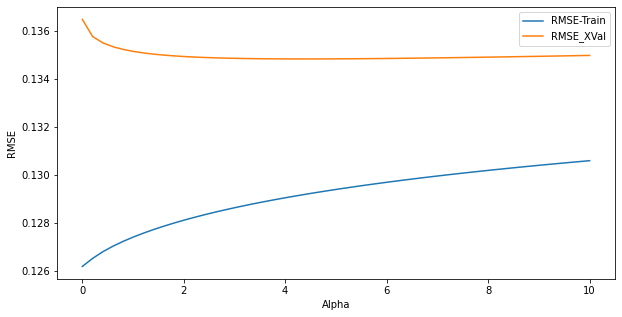

In [38]:
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(alpha, t_rmse, label='RMSE-Train')
ax.plot(alpha, cv_rmse, label='RMSE_XVal')
pl.legend( ('RMSE-Train', 'RMSE_XVal') )
pl.ylabel('RMSE')
pl.xlabel('Alpha')
pl.show()

In [39]:
# Create linear regression object with a ridge coefficient 0.25
ridge = Ridge(alpha=0.001)

# Train the model using the training set
ridge.fit(X_train, y_train)

p_train = ridge.predict(X_train) # p_train is the array of predicted training values
rmse_train = np.sqrt(mean_squared_error(p_train, y_train))

# Compute RMSE on the set-aside test data

p_test = ridge.predict(X_test) # predictions on the test instances
rmse_test = np.sqrt(mean_squared_error(p_test, y_test))

method_name = 'Ridge Regression'
print("\n")
print('Method: %s' %method_name)
print('RMSE on training: %.8f' %rmse_train)
print('RMSE on test data: %.8f' %rmse_test)



Method: Ridge Regression
RMSE on training: 0.12619600
RMSE on test data: 0.14345978


Lasso Regression


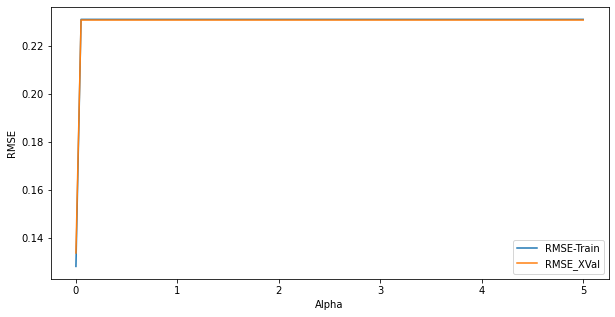

In [40]:
print('Lasso Regression')
# print('alpha\t RMSE_train\t RMSE_10cv\t Gap\n')
alpha = np.linspace(.0001,5.0,100) # create an array of 50 evenly spaced numbers between 0.01 and 5.0
t_rmse = np.array([])
cv_rmse = np.array([])
from sklearn.linear_model import Lasso
for a in alpha:
    lasso = Lasso(alpha=a)
    
    # computing the RMSE on training data
    lasso.fit(X_train, y_train)
    p_train = lasso.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(p_train, y_train))

    # Compute RMSE using 10-fold x-validation
    rmse_10cv = cross_validate(lasso, X_train, y_train, 10)
    
    gap = rmse_10cv - rmse_train
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_10cv])
    
    # print('{:.3f}\t {:.4f}\t\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_10cv,gap))
    
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(alpha, t_rmse, label='RMSE-Train')
ax.plot(alpha, cv_rmse, label='RMSE_XVal')
pl.legend( ('RMSE-Train', 'RMSE_XVal') )
pl.ylabel('RMSE')
pl.xlabel('Alpha')
pl.show()

In [41]:
# Let's pick 0.3 for lasso regularization coefficient
lasso = Lasso(alpha=0.01)

# Train the model using the training set
lasso.fit(X_train, y_train)

p_train = lasso.predict(X_train) # p_train is the array of predicted training values
rmse_train = np.sqrt(mean_squared_error(p_train, y_train))

# Compute RMSE on the set-aside test data

p_test = lasso.predict(X_test) # predictions on the test instances
rmse_test = np.sqrt(mean_squared_error(p_test, y_test))

method_name = 'Lasso Regression'
print("\n")
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on test data: %.4f' %rmse_test)



Method: Lasso Regression
RMSE on training: 0.1520
RMSE on test data: 0.1643


### A lower alpha value reduces the RSME score of the model. 

# 1E,

### Perform Stochastic Gradient Descent Regressor

In [42]:
#spliting model 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.20,  random_state=33)

In [43]:
from sklearn.preprocessing import StandardScaler
# SGD is very senstitive to varying-sized feature values. So, first we need to do feature scaling.
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [44]:
## Transfroming data 
X_train_s= np.array(X_train_s)
X_test_s =np.array(X_test_s)
train_label_array = np.array(y_train).flatten()
test_label_array = np.array(y_test).flatten()

In [45]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

alpha_ = np.linspace(.001,5.0,100)
eta_ = np.linspace(.005,0.005,1)
maxintration= (5000,10000)
parameter={"penalty":("l1",'l2'), "alpha":(alpha_ ), "eta0":(eta_),"max_iter":(maxintration)}
sgdreg=SGDRegressor()

SGD_with_gridsearch = GridSearchCV(sgdreg,parameter)

# Compute RMSE on training data
SGD_with_gridsearch .fit(X_train_s,y_train)
p_train = SGD_with_gridsearch.predict(X_train_s)
rmse_train = np.sqrt(mean_squared_error(p_train, y_train))

In [46]:
# Compute RMSE on the set-aside test data

p_test = SGD_with_gridsearch.predict(X_test_s) # predictions on the test instances
rmse_test = np.sqrt(mean_squared_error(p_test, y_test))

method_name = 'Stochastic Gradient Descent Regression'
print("\n")
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on test data: %.4f' %rmse_test)



Method: Stochastic Gradient Descent Regression
RMSE on training: 0.1314
RMSE on test data: 0.1460


In [47]:
print('The parameters combination that would give best accuracy is : ')
print(SGD_with_gridsearch.best_params_)

The parameters combination that would give best accuracy is : 
{'alpha': 0.10198989898989898, 'eta0': 0.005, 'max_iter': 5000, 'penalty': 'l2'}


### The parameter {'alpha': 0.001, 'eta0': 0.005, 'max_iter': 5000, 'penalty': 'l1'}, with SGD regression

## Model Optimization 

In [48]:
from sklearn.linear_model import ElasticNet


Elastic Net Regression
alpha	 RMSE_train	 RMSE_10cv	 Gap

0.001	 0.1298		 0.1338		 0.0040
0.051	 0.1535		 0.1536		 0.0001
0.102	 0.1774		 0.1771		 -0.0002
0.152	 0.1990		 0.1988		 -0.0002
0.203	 0.2177		 0.2175		 -0.0002
0.253	 0.2299		 0.2296		 -0.0003
0.304	 0.2312		 0.2309		 -0.0003
0.354	 0.2312		 0.2309		 -0.0003
0.405	 0.2312		 0.2309		 -0.0003
0.455	 0.2312		 0.2309		 -0.0003
0.506	 0.2312		 0.2309		 -0.0003
0.556	 0.2312		 0.2309		 -0.0003
0.607	 0.2312		 0.2309		 -0.0003
0.657	 0.2312		 0.2309		 -0.0003
0.708	 0.2312		 0.2309		 -0.0003
0.758	 0.2312		 0.2309		 -0.0003
0.809	 0.2312		 0.2309		 -0.0003
0.859	 0.2312		 0.2309		 -0.0003
0.910	 0.2312		 0.2309		 -0.0003
0.960	 0.2312		 0.2309		 -0.0003
1.011	 0.2312		 0.2309		 -0.0003
1.061	 0.2312		 0.2309		 -0.0003
1.112	 0.2312		 0.2309		 -0.0003
1.162	 0.2312		 0.2309		 -0.0003
1.213	 0.2312		 0.2309		 -0.0003
1.263	 0.2312		 0.2309		 -0.0003
1.314	 0.2312		 0.2309		 -0.0003
1.364	 0.2312		 0.2309		 -0.0003
1.415	 0.2312		 0.23

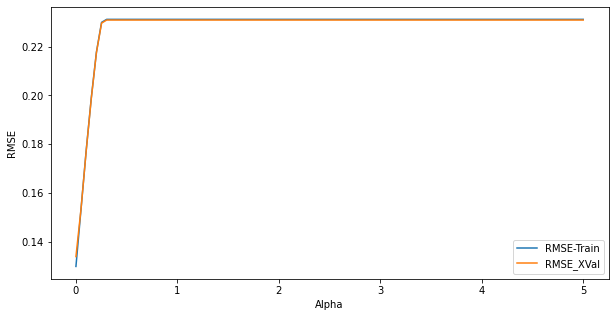

In [49]:
print('Elastic Net Regression')
print('alpha\t RMSE_train\t RMSE_10cv\t Gap\n')
alpha = np.linspace(.001,5.0,100) # create an array of 50 evenly spaced numbers between 0.01 and 5.0

t_rmse = np.array([])
cv_rmse = np.array([])

for a in alpha:
    elastic = ElasticNet(alpha=a, l1_ratio= 0.15)
    
    # computing the RMSE on training data
    elastic.fit(X_train, y_train)
    p_train = elastic.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(p_train, y_train))

    # Compute RMSE using 10-fold x-validation
    rmse_10cv = cross_validate(elastic, X_train, y_train, 10)
    
    gap = rmse_10cv - rmse_train
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_10cv])
    
    print('{:.3f}\t {:.4f}\t\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_10cv,gap))
    
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(alpha, t_rmse, label='RMSE-Train')
ax.plot(alpha, cv_rmse, label='RMSE_XVal')
pl.legend( ('RMSE-Train', 'RMSE_XVal') )
pl.ylabel('RMSE')
pl.xlabel('Alpha')
pl.show()

# 2

In [90]:
#load data 
terms= pd.read_table('terms.txt', header= None)
classes= pd.read_table('classes.txt', index_col=0,delimiter=' ', header= None)
matrix= pd.read_csv('matrix.txt', header= None)

In [91]:
terms.head()

,0
0,aa
1,aargh
2,aaron
3,aaronc
4,ab


In [92]:
classes.head()

,1
0,
0,0
1,1
2,1
3,1
4,2


In [93]:
matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##  2a, 

In [94]:
def cosine_distance(x, D):
        # first find the vector norm for each instance in D as wel as the norm for vector x
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
        x_norm = np.linalg.norm(x)
        # Compute Cosine: divide the dot product o x and each instance in D by the product of the two norms
        sims = np.dot(D,x)/(D_norm * x_norm)
        # The distance measure will be the inverse of Cosine similarity
        dists = 1 - sims
    # return the indexes of K nearest neighbors
        return dists

## 2b,

In [95]:
######### SINCE MATRIX IS IN TERMS BY DOC ... WE CONVERT IT TO DOC BY TERMS
doc_term_matrix= matrix.T
doc_term_matrix

,0,1,2,3,4,5,6,7,8,9,...,9318,9319,9320,9321,9322,9323,9324,9325,9326,9327
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
matrix

numpy.matrix

In [57]:
#spliting model 
from sklearn.model_selection import train_test_split
X_train_, X_test_ = train_test_split(doc_term_matrix, test_size=0.20,  random_state=99)

In [58]:
numTerms=X_train_.shape[1]
NDocs = X_train_.shape[0]
print(numTerms)
print(NDocs)

9328
2000


##### Compute TFxIDF

In [59]:
#creating TXXIDF
# Note: doc frequency (df) for a term t is the number of docs in which t appears divided by total number of docs

# first let's find the doc counts for each term
DF = pd.DataFrame([(matrix!=0).sum(1)]).T
DF.head(10)

,0
0,10
1,6
2,22
3,9
4,13
5,9
6,30
7,3
8,56
9,172


In [60]:
# Create a matrix with all entries = NDocs
NMatrix=(np.ones(np.shape(matrix), dtype=float)*NDocs)
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print(NMatrix)
NMatrix.shape

[[2000. 2000. 2000. ... 2000. 2000. 2000.]
 [2000. 2000. 2000. ... 2000. 2000. 2000.]
 [2000. 2000. 2000. ... 2000. 2000. 2000.]
 ...
 [2000. 2000. 2000. ... 2000. 2000. 2000.]
 [2000. 2000. 2000. ... 2000. 2000. 2000.]
 [2000. 2000. 2000. ... 2000. 2000. 2000.]]


(9328, 2500)

In [61]:
# Convert each entry into IDF values
# IDF is the log of the inverse of document frequency
# Note that IDF is only a function of the term, so all columns will be identical.

IDF = np.log2(np.divide(NMatrix, np.array(DF)))

In [62]:
np.set_printoptions(precision=2,suppress=True)
print(IDF)

[[7.64 7.64 7.64 ... 7.64 7.64 7.64]
 [8.38 8.38 8.38 ... 8.38 8.38 8.38]
 [6.51 6.51 6.51 ... 6.51 6.51 6.51]
 ...
 [9.38 9.38 9.38 ... 9.38 9.38 9.38]
 [9.38 9.38 9.38 ... 9.38 9.38 9.38]
 [8.97 8.97 8.97 ... 8.97 8.97 8.97]]


In [63]:
IDF.shape

(9328, 2500)

In [64]:
# Finally compute the TFxIDF values for each document-term entry
TD_tfidf = matrix * IDF

In [65]:
TD_tfidf.head()

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
TD_tfidf.shape

(9328, 2500)

In [67]:
# First transpose to get the doc by term matrix and then call kMeans to cluster the docs
DT_tfidf = TD_tfidf.T
DT_tfidf = np.array(DT_tfidf)

In [68]:
#spliting model 
from sklearn.model_selection import train_test_split
X_train_, X_test_ = train_test_split(DT_tfidf, test_size=0.20,  random_state=99)

In [96]:
cosine_distance(X_test_[1],X_train_)

array([1.  , 1.  , 0.99, ..., 1.  , 0.99, 0.96])

## 2c,

In [70]:
from numpy import *


def distEuclid(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2))) #la.norm(vecA-vecB)

def cosine_distance(x, D):
        # first find the vector norm for each instance in D as wel as the norm for vector x
        #D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
        x_norm = np.linalg.norm(x)
        D_norm = np.linalg.norm(D)
        # Compute Cosine: divide the dot product o x and each instance in D by the product of the two norms
        sims = np.dot(D,x)/(D_norm * x_norm)
        # The distance measure will be the inverse of Cosine similarity
        dists = 1 - sims
    # return the indexes of K nearest neighbors
        return dists

def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = zeros((k,n), dtype=float)
    for j in range(n): #create random cluster centers
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = minJ + rangeJ * random.rand(k)
    return centroids 

def kMeans(dataSet, k, distMeas=distEuclid, createCent=randCent):
    m = shape(dataSet)[0]
    clusterAssment = zeros((m,2)) #create mat to assign data points 
                                  #to a centroid, also holds SE of each point
    centroids = createCent(dataSet, k)
    clusterChanged = True
    cout=0
    while clusterChanged:
        clusterChanged = False
        for i in range(m): #for each data point assign it to the closest centroid
            minDist = inf; minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        # print centroids
        for cent in range(k):#recalculate centroids
            ptsInClust = dataSet[nonzero(clusterAssment[:,0]==cent)[0]] #get all the point in this cluster - Note: this was incorrect in the original distribution.
            if(len(ptsInClust)!=0):
                centroids[cent,:] = mean(ptsInClust, axis=0) #assign centroid to mean - Note condition was added 10/28/2013
    return  centroids, clusterAssment


In [71]:
%%time
centr,c=kMeans(X_train_,5)

Wall time: 8.55 s


In [72]:
X_train_.shape

(2000, 9328)

In [73]:
####GETTING THE NUMBER OF NUMBER IN THE CLUSTER.
values, counts = np.unique(c[:,[0]], return_counts=True)
print(values, counts)

[0. 1. 2. 3.] [1995    2    2    1]


In [75]:
cluster_all= c[:,[0]]
all_value=[]
index=[]
all_ans=[]
for i in range(len(cluster_all)):
    for unique_all in range(len(values)):
        #print(values[unique_all])
        if  cluster_all[i]   ==  values[unique_all]:
            all_value.append(values[unique_all])
            index.append(i)
            
dict_1={}
dict_2={}
for key,value in zip(all_value,index):
    if key not in dict_1:
        dict_1[key]=[value]
    else:
        dict_1[key].append(value)
        
for key, value in dict_1.items():
    for i in range(len(values)):
        if key == values[i]:
            bb=doc_term_matrix.iloc[value].sum(axis=0)
            ans=bb.nlargest(10)
            all_ans.append(ans)
            dict_2=ans.to_dict()
            persnt_1=(ans/counts[i])
            print('REPORT FOR CLUSTER :', i)
            print("Number of Documents :", counts[i])
            print("----------------------------------------------")
            print("word","Term","%")
            print(*terms.iloc[ans.index].values,"\n",np.array(ans.values),"\n",np.array(persnt_1.values))
            #print(*terms.iloc[ans.index].values,sep = "\n",*np.array(ans.values))




REPORT FOR CLUSTER : 0
Number of Documents : 1995
----------------------------------------------
word Term %
['ax'] ['max'] ['subject'] ['on'] ['write'] ['god'] ['get'] ['know'] ['articl'] ['window'] 
 [46926  3383  2136  1507  1269  1058   993   952   917   915] 
 [23.52  1.7   1.07  0.76  0.64  0.53  0.5   0.48  0.46  0.46]
REPORT FOR CLUSTER : 1
Number of Documents : 2
----------------------------------------------
word Term %
['franci'] ['strip'] ['algorithm'] ['captain'] ['chip'] ['escrow'] ['whaler'] ['blunder'] ['boudri'] ['cadkeycom'] 
 [4 4 3 3 3 3 3 2 2 2] 
 [2.  2.  1.5 1.5 1.5 1.5 1.5 1.  1.  1. ]
REPORT FOR CLUSTER : 2
Number of Documents : 2
----------------------------------------------
word Term %
['heaven'] ['believ'] ['go'] ['hell'] ['team'] ['nhl'] ['atterlep'] ['big'] ['current'] ['die'] 
 [7 6 6 5 4 3 2 2 2 2] 
 [3.5 3.  3.  2.5 2.  1.5 1.  1.  1.  1. ]
REPORT FOR CLUSTER : 3
Number of Documents : 1
----------------------------------------------
word Term %
['pgp']

## 2d,

### Train on all dataset to evaluate model.

In [76]:
DT_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [77]:
originals_DT =np.array(doc_term_matrix)
originals_DT

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [106]:
%%time
#TRAIN
centeriod_all_train,all_predicted_cluster=kMeans(DT_tfidf,5)

Wall time: 12.3 s


In [107]:
####GETTING THE NUMBER OF NUMBER IN THE CLUSTER.
values_, counts_ = np.unique(all_predicted_cluster[:,[0]], return_counts=True)
print(values_, counts_)

[0. 1. 2. 4.] [2493    3    1    3]


In [108]:
all_predicted_cluster[0:2500,:]

array([[    0.  ,  3517.85],
       [    0.  ,  2229.29],
       [    0.  , 22267.72],
       ...,
       [    0.  ,  3171.36],
       [    0.  ,  1095.2 ],
       [    0.  ,  6914.32]])

In [109]:
trained_cluster = pd.DataFrame(all_predicted_cluster, columns=["Cluster", "error"])
trained_cluster.head(10)

,Cluster,error
0,0.0,3517.845007
1,0.0,2229.285272
2,0.0,22267.724906
3,0.0,11436.094044
4,0.0,12092.535754
5,0.0,1125.598721
6,0.0,10308.982703
7,0.0,4162.974552
8,0.0,4597.178247
9,0.0,2438.516180


In [110]:
def cluster_evalueate(predicted_cluster, original_class):
    from collections import Counter
    c=[]
    cout=0
    for i in range(len(predicted_cluster)):
        if predicted_cluster[i]==original_class[i]:
            cout+=1
    return ("completness",cout/len(predicted_cluster))

In [111]:
def hom_gen_evaluation(predicted_cluster, original_class):
    from collections import Counter
    c=[]
    cout_=0
    for i in range(len(predicted_cluster)):
        if predicted_cluster[i] != original_class[i]:
            cout_+=1
    return ("Homgenous",(cout_/len(predicted_cluster))/501)

In [112]:
## Transfroming data 
predicted_in=np.array(trained_cluster["Cluster"])
originals_clust_in =np.array(classes[1])


In [113]:
####EVALUEATE completness
cluster_evalueate(predicted_in,originals_clust_in)

('completness', 0.1972)

In [114]:
####EVALUEATE Homogeneity
hom_gen_evaluation(predicted_in,originals_clust_in)

('Homgenous', 0.0016023952095808383)

### Extra Credit 

In [87]:
%%time
k_min=4
k_max=8
Euclid=[]
for i in range(3):
    for k in range (k_min,k_max+1,1):
        centeriod_all_train,all_predicted_cluster=kMeans(DT_tfidf,k)
        trained_cluster = pd.DataFrame(all_predicted_cluster, columns=["Cluster", "error"])
        ## Transfroming data 
        predicted_in=np.array(trained_cluster["Cluster"])
        originals_clust_in =np.array(classes[1])
        a=cluster_evalueate(predicted_in,originals_clust_in)
        b=hom_gen_evaluation(predicted_in,originals_clust_in)
        
        print("k_value:",k,a,b)
    print("----------------------------------------------")
    

k_value: 4 ('completness', 0.1972) ('Homgenous', 0.0016023952095808383)
k_value: 5 ('completness', 0.2) ('Homgenous', 0.001596806387225549)
k_value: 6 ('completness', 0.2004) ('Homgenous', 0.001596007984031936)
k_value: 7 ('completness', 0.0004) ('Homgenous', 0.0019952095808383236)
k_value: 8 ('completness', 0.2004) ('Homgenous', 0.001596007984031936)
----------------------------------------------
k_value: 4 ('completness', 0.2012) ('Homgenous', 0.0015944111776447106)
k_value: 5 ('completness', 0.1972) ('Homgenous', 0.0016023952095808383)
k_value: 6 ('completness', 0.2004) ('Homgenous', 0.001596007984031936)
k_value: 7 ('completness', 0.2016) ('Homgenous', 0.0015936127744510978)
k_value: 8 ('completness', 0.2012) ('Homgenous', 0.0015944111776447106)
----------------------------------------------
k_value: 4 ('completness', 0.2004) ('Homgenous', 0.001596007984031936)
k_value: 5 ('completness', 0.2) ('Homgenous', 0.001596806387225549)
k_value: 6 ('completness', 0.2008) ('Homgenous', 0.001

### For each itteration the completness and homogeneity changes they are inversely related, but they also converge

## 2e,

In [115]:
from numpy import *


def distEuclid(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2))) #la.norm(vecA-vecB)

def cosine_distance(x, D):
        # first find the vector norm for each instance in D as wel as the norm for vector x
        #D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
        x_norm = np.linalg.norm(x)
        D_norm = np.linalg.norm(D)
        # Compute Cosine: divide the dot product o x and each instance in D by the product of the two norms
        sims = np.dot(D,x)/(D_norm * x_norm)
        # The distance measure will be the inverse of Cosine similarity
        dists = 1 - sims
    # return the indexes of K nearest neighbors
        return dists

def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = zeros((k,n), dtype=float)
    for j in range(n): #create random cluster centers
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = minJ + rangeJ * random.rand(k)
    return centroids 

def kMeans(dataSet, k, distMeas=cosine_distance, createCent=randCent):
    m = shape(dataSet)[0]
    clusterAssment = zeros((m,2)) #create mat to assign data points 
                                  #to a centroid, also holds SE of each point
    centroids = createCent(dataSet, k)
    clusterChanged = True
    cout=0
    while clusterChanged:
        clusterChanged = False
        for i in range(m): #for each data point assign it to the closest centroid
            minDist = inf; minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,distJI
        # print centroids
        for cent in range(k):#recalculate centroids
            ptsInClust = dataSet[nonzero(clusterAssment[:,0]==cent)[0]] #get all the point in this cluster - Note: this was incorrect in the original distribution.
            if(len(ptsInClust)!=0):
                centroids[cent,:] = mean(ptsInClust, axis=0) #assign centroid to mean - Note condition was added 10/28/2013
    return  centroids, clusterAssment


In [116]:
#spliting model 
from sklearn.model_selection import train_test_split
X_train_, X_test_ = train_test_split(DT_tfidf, test_size=0.20,  random_state=99)

In [117]:
centeriod_all_train,all_predicted_cluster=kMeans(X_test_,5)

In [118]:
test_cluster = pd.DataFrame(all_predicted_cluster, columns=["Cluster", "COSINE SIM"])
test_cluster.head(10)

,Cluster,COSINE SIM
0,4.0,0.827004
1,4.0,0.887780
2,4.0,0.869878
3,4.0,0.936909
4,4.0,0.828713
5,4.0,0.859801
6,4.0,0.799488
7,4.0,0.918624
8,4.0,0.908179
9,4.0,0.804227


In [119]:
####GETTING THE NUMBER OF NUMBER IN THE CLUSTER.
values, counts = np.unique(all_predicted_cluster[:,[0]], return_counts=True)
print(values, counts)


[0. 4.] [  2 498]
